In [13]:
# Import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from graph import draw_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.saving import load_model

In [14]:
# Set directories
root_dir = os.getcwd()
data_dir = os.path.join(root_dir, "mosquitoes-dataset")
model_dir = os.path.join(root_dir, "models")
test_dir = os.path.join(root_dir, "test-dataset")

In [15]:
# Class name
class_names = os.listdir(data_dir)

In [16]:
model = load_model(os.path.join(model_dir, "mosquitoes_model.keras"))

In [17]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

In [18]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                      seed=1234,
                                                      image_size=IMG_SIZE,
                                                      batch_size=35,
                                                      )

Found 35 files belonging to 2 classes.


In [19]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
yhat = model.predict_on_batch(image_batch)

yhat = tf.nn.softmax(yhat)

print('Predictions:\n', yhat.numpy())

label_yhat = np.empty(0, dtype=int)
for i in range(35):
    label_yhat= np.append(label_yhat, np.argmax(yhat[i]))

print('True labels:\n', label_batch)
print('Predicted labels:\n', label_yhat)

Predictions:
 [[0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.7310252  0.26897475]
 [0.26894143 0.73105854]
 [0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.73105854 0.26894143]
 [0.73105854 0.26894143]
 [0.73105854 0.26894143]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.26894143 0.73105854]
 [0.26894143 0.73105854]
 [0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.26894143 0.73105854]
 [0.73105854 0.26894143]
 [0.73105854 0.26894143]
 [0.26894143 0.73105854]
 [0.26894143 0.73105854]
 [0.7309475  0.26905254]]
True labels:
 [1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1]
Predicted labels:
 [1 0 

In [20]:
cm = confusion_matrix(label_batch, label_yhat)
print(cm)

[[12  0]
 [ 6 17]]


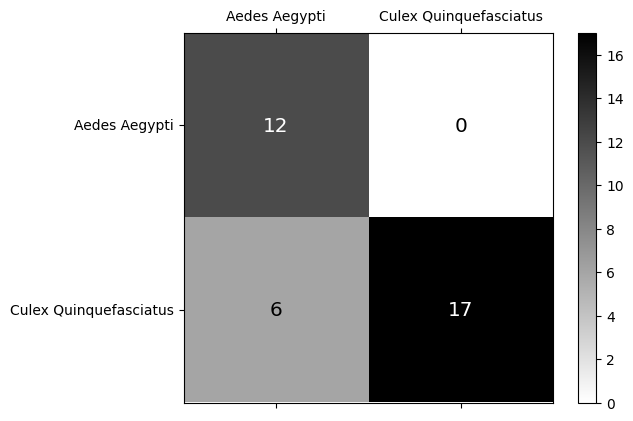

In [21]:
draw_confusion_matrix(cm, class_names)

In [22]:
""" cm_disp = ConfusionMatrixDisplay.from_predictions(y_true=label_batch,
                                                  y_pred=label_yhat,
                                                  display_labels=class_names,
                                                  cmap=plt.cm.gray_r,
                                                  ) """

' cm_disp = ConfusionMatrixDisplay.from_predictions(y_true=label_batch,\n                                                  y_pred=label_yhat,\n                                                  display_labels=class_names,\n                                                  cmap=plt.cm.gray_r,\n                                                  ) '

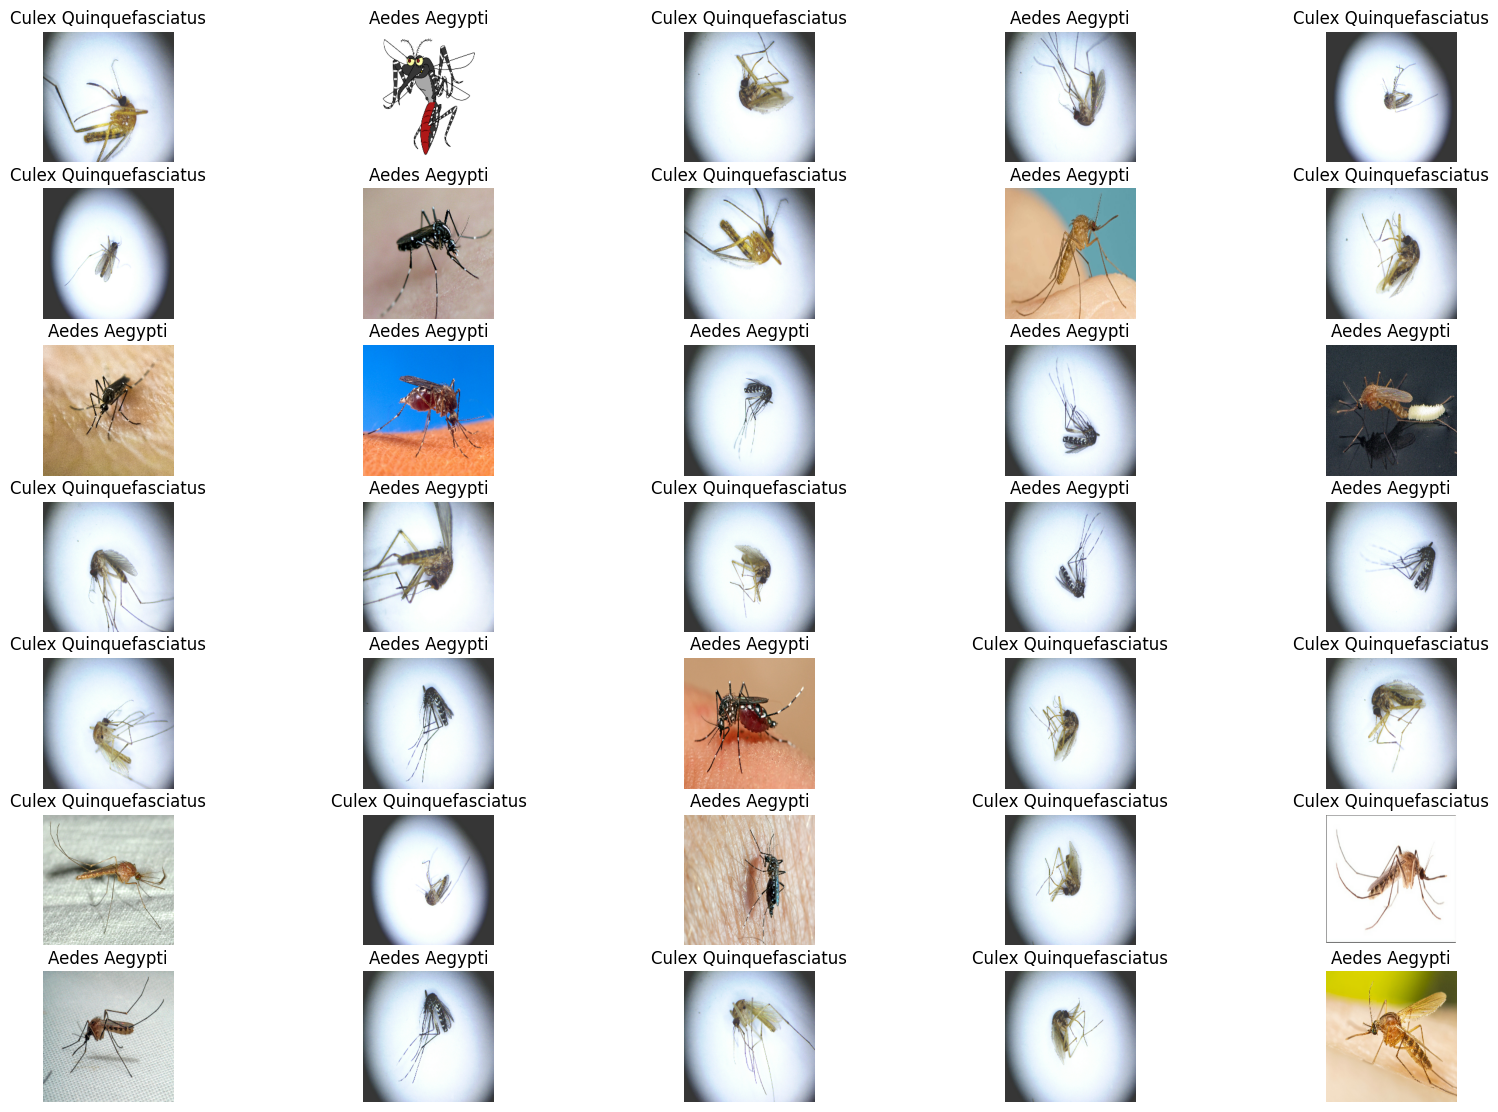

In [23]:
plt.figure(figsize=(20, 20))
for i in range(35):
    plt.subplot(10, 5, i + 1)
    plt.imshow(image_batch[i].astype('uint8'))
    plt.title(class_names[np.argmax(yhat[i])])
    plt.axis('off')

In [24]:
""" plt.figure(figsize=(20, 20))
for index, image in enumerate(os.listdir(test_dir)):
    img = cv2.imread(os.path.join(test_dir, image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = tf.image.resize(img, IMG_SIZE)

    yhat = model.predict(np.expand_dims(img, 0))
    yhat = tf.nn.softmax(yhat[0])
    yhat = np.array(yhat)
    
    plt.subplot(10, 5, index + 1)
    plt.imshow(img.numpy().astype('uint8'))
    plt.title(class_names[np.argmax(yhat)])
    plt.axis("off") """

' plt.figure(figsize=(20, 20))\nfor index, image in enumerate(os.listdir(test_dir)):\n    img = cv2.imread(os.path.join(test_dir, image))\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    img = tf.image.resize(img, IMG_SIZE)\n\n    yhat = model.predict(np.expand_dims(img, 0))\n    yhat = tf.nn.softmax(yhat[0])\n    yhat = np.array(yhat)\n    \n    plt.subplot(10, 5, index + 1)\n    plt.imshow(img.numpy().astype(\'uint8\'))\n    plt.title(class_names[np.argmax(yhat)])\n    plt.axis("off") '